# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
!pip3 install chart_studio

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


<h1>Reading Data</h1>

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)


Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:21<00:00, 1332.76it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [19]:
sent1 = decontracted(project_data['project_title'].values[2000])
print(sent1)
print("="*50)


Steady Stools for Active Learning


In [20]:
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
# https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent1.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 31120.47it/s]


In [21]:
project_catogories = list(project_data['project_grade_category'].values)
project_cat_list = []
for i in project_catogories: 
    temp = ""
    for j in i.split(','):
        j = j.replace(' ','_') 
        temp +=j.strip()+" "
        temp = temp.replace('-','_')
    project_cat_list.append(temp.strip())
project_data['clean_projectcategories'] = project_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_projectcategories'].values:
    my_counter.update(word.split())
project_cat_dict = dict(my_counter)
sorted_project_cat_dict = dict(sorted(project_cat_dict.items(), key=lambda kv: kv[1]))

In [22]:
project_data['clean_projectcategories']=project_data['clean_projectcategories'].str.lower()

In [23]:
project_data["teacher_prefix"].fillna( method ='ffill', inplace = True)

In [24]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')


In [25]:
project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)


In [26]:
X_essa=[]
for i in project_data['clean_essays']:
    b=len(i.split())
    X_essa.append(b)
project_data['no_essay']=X_essa

In [27]:
project_data['clean_titles'] = preprocessed_title


In [28]:
X_tri=[]
for i in project_data['clean_titles']:
    b=len(i.split())
    X_tri.append(b)
project_data['notitlewords']=X_tri


In [29]:
project_data.drop(['project_title'] , axis=1 , inplace=True)


In [30]:
project_data.count()

Unnamed: 0                                      109248
id                                              109248
teacher_id                                      109248
teacher_prefix                                  109248
school_state                                    109248
project_submitted_datetime                      109248
project_resource_summary                        109248
teacher_number_of_previously_posted_projects    109248
project_is_approved                             109248
clean_categories                                109248
clean_subcategories                             109248
essay                                           109248
clean_projectcategories                         109248
price                                           109248
quantity                                        109248
clean_essays                                    109248
no_essay                                        109248
clean_titles                                    109248
notitlewor

<h1>Sentiment Analysis score of essay</h1>

It tells the exact meaning of the sentence what actully the senetence really wants to tell.wheather it is positve or negative based on the emotion and attitude of the sentence.<br>
https://towardsdatascience.com/sentiment-analysis-beyond-words-6ca17a6c1b54

In [31]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [33]:
ss_neg=[]
ss_pos=[]
ss_neu=[]
ss_compound=[]
for i in project_data['clean_essays']:
    ss = sid.polarity_scores(i)
    ss_neg.append(ss['neg'])
    ss_neu.append(ss['neu'])
    ss_pos.append(ss['pos'])
    ss_compound.append(ss['compound'])


In [34]:
project_data['ss_neg']=ss_neg
project_data['ss_pos']=ss_pos
project_data['ss_neu']=ss_neu
project_data['ss_compound']=ss_compound
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories     ...       price quantity  \
0             Literacy_Language     ...       154.6       23   
1  History_Civics Health_Sports     ...       299.0        1   

                                        clean_essays  no_essay  \
0  my students english learners working english s...       161   
1  our students arrive school eager learn they po...       109   

                                clean_titles notitlewords  ss_neg ss_pos  \
0  educational support english learners home            5   0.012  0.144   
1           wanted projector hungry learners            4   0.048  0.283   

   ss_neu  ss_compound  
0   0.844       0.9694  
1   0.669       0.9856  

[2 rows x 23 columns]

# Assignment 9: RF and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [35]:
y=project_data['project_is_approved'].values
y=y[0:30000]
project_data.drop(['project_is_approved'] , axis=1, inplace = True)
X=project_data[0:30000]

In [36]:
X.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects              clean_categories  \
0                                             0             Literacy_Language   
1                                             7  History_Civics Health_Sports   

            clean_subcategories     ...       price quantity  \
0                  ESL Literacy     ...       154.6       23   
1  Civics_Government TeamSports     ...       299.0        1   

                                        clean_essays  no_essay  \
0  my students english learners working english s...       161   
1  our students arrive school eager learn they po...       109   

                                clean_titles  notitlewords ss_neg  ss_pos  \
0  educational support english learners home             5  0.012   0.144   
1           wanted projector hungry learners             4  0.048   0.283   

   ss_neu  ss_compound  
0   0.844       0.9694  
1   0.669       0.9856  

[2 rows x 22 columns]

##SPLITTING USING TRAIN_TEST_SPLIT

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [38]:
#Shape of training , test and cross validation data
print("X_train {0} || Y_train {1}".format(X_train.shape,y_train.shape))
print("X_cv {0} || Y_cv {1}".format(X_cv.shape,y_cv.shape))
print("X_test {0} || Y_test {1}".format(X_test.shape,y_test.shape))

X_train (13467, 22) || Y_train (13467,)
X_cv (6633, 22) || Y_cv (6633,)
X_test (9900, 22) || Y_test (9900,)


<h1>2.2 Make Data Model Ready: encoding numerical, categorical features</h1>

<h2>RESPONSE CODING CLEAN CATEGORIES</h2>

In [39]:
to_dict={}
l1=X_train['clean_categories']
p2=pd.DataFrame(l1)
p2.head(5)


clean_categories
24091         Math_Science Music_Arts
8408      Math_Science History_Civics
4264                    Health_Sports
17289                    Math_Science
21914  Math_Science Literacy_Language

In [40]:
y_train2=list(y_train)
approve=pd.DataFrame({'project_is_approved':y_train2})
p2['project_is_approved']=y_train2
p2.head(2)

clean_categories  project_is_approved
24091      Math_Science Music_Arts                    1
8408   Math_Science History_Civics                    1

In [41]:
pp=p2[p2['project_is_approved']==1]
nn=p2[p2['project_is_approved']==0]


In [42]:
neg_index=list(nn.index)
pos_index=list(pp.index)
l2=p2['clean_categories'].unique().tolist()
l1=p2['clean_categories'].tolist()
l1[0:5]

['Math_Science Music_Arts',
 'Math_Science History_Civics',
 'Health_Sports',
 'Math_Science',
 'Math_Science Literacy_Language']

In [43]:
for i in l1:
    if i not in to_dict:
        to_dict[i]=1
    else:
        to_dict[i]+=1

In [44]:
dict_pos={}
for i in pp['clean_categories']:
    if i not in dict_pos:
        dict_pos[i]=1
    else:
        dict_pos[i]+=1

In [45]:
dict_neg={}
for i in nn['clean_categories']:
    if i not in dict_neg:
        dict_neg[i]=1
    else:
        dict_neg[i]+=1

<h1>Probability</h1>

In [46]:
prob_pos={}
prob_neg={}
for i in l2:
    if i not in dict_neg:
        prob_neg[i]=0
    else:
        prob_neg[i]=(dict_neg[i]/to_dict[i])
    if i not in dict_pos:
        prob_pos[i]=0
    else:
        prob_pos[i]=(dict_pos[i]/to_dict[i])

<h1>RESPONSE TABLE for train</h1>

In [47]:
l_pos=[]
l_neg=[]
State=[]
for i in l2:
    if i not in dict_neg:
        l_neg.append(0)
    else:
        l_neg.append(dict_neg[i])
    if i not in dict_pos:
        l_pos.append(0)
    else:
        l_pos.append(dict_pos[i])
for i in l2:
    State.append(i)

In [48]:
data = {'prefix':State,
        'Class_0':l_neg,
        'Class_1':l_pos}
response=pd.DataFrame(data)

<h1>RESPONSE TABLE</h1>


In [49]:
response.head(10)


prefix  Class_0  Class_1
0          Math_Science Music_Arts       41      150
1      Math_Science History_Civics       12       50
2                    Health_Sports      211     1085
3                     Math_Science      395     1706
4   Math_Science Literacy_Language       27      254
5                       Music_Arts       87      550
6                Literacy_Language      401     2555
7     Literacy_Language Music_Arts       29      177
8   Literacy_Language Math_Science      241     1592
9  Health_Sports Literacy_Language       13       81

In [50]:
state_0=[]
state_1=[]
for i in l1:
    state_1.append(prob_pos[i])
    state_0.append(prob_neg[i])
X_train_cl_0=np.array(state_0).reshape(-1,1)
X_train_cl_1=np.array(state_1).reshape(-1,1)

In [51]:
ed={'State_0':state_0,
    'State_1':state_1,
    'class':l1}
encoded_data=pd.DataFrame(ed)

<h1>ENCODED DATA OF TRAIN</h1>

In [52]:
encoded_data.head(5)

State_0   State_1                           class
0  0.214660  0.785340         Math_Science Music_Arts
1  0.193548  0.806452     Math_Science History_Civics
2  0.162809  0.837191                   Health_Sports
3  0.188006  0.811994                    Math_Science
4  0.096085  0.903915  Math_Science Literacy_Language

In [53]:
encoded_data.shape


(13467, 3)

<b>FOR CROSS VALIDATION

In [54]:
l1_cv=X_cv['clean_categories']


In [55]:
state_0_cv=[]
state_1_cv=[]
for i in l1_cv:
    if i in l2:
        state_1_cv.append(prob_pos[i])
        state_0_cv.append(prob_neg[i])
    else:
        state_1_cv.append(0.5)
        state_0_cv.append(0.05)
X_cv_cl_0=np.array(state_0_cv).reshape(-1,1)
X_cv_cl_1=np.array(state_1_cv).reshape(-1,1)

In [56]:
ed={'State_0':state_0_cv,
    'State_1':state_1_cv,
    'class':l1_cv}
encoded_data=pd.DataFrame(ed)

In [57]:
encoded_data.head(5)


State_0   State_1                              class
5813   0.136578  0.863422                         Music_Arts
3634   0.131478  0.868522     Literacy_Language Math_Science
17980  0.188006  0.811994                       Math_Science
148    0.164430  0.835570  AppliedLearning Literacy_Language
25587  0.188006  0.811994                       Math_Science

<b>Test Data

In [58]:
l1_test=X_test['clean_categories']

In [59]:
state_0_test=[]
state_1_test=[]
for i in l1_test:
    if i in l2:
        state_1_test.append(prob_pos[i])
        state_0_test.append(prob_neg[i])
    else:
        state_1_test.append(0.5)
        state_0_test.append(0.05)
X_test_cl_0=np.array(state_0_test).reshape(-1,1)
X_test_cl_1=np.array(state_1_test).reshape(-1,1)


In [60]:
ed={'State_0':state_0_test,
    'State_1':state_1_test,
    'class':l1_test}
encoded_data=pd.DataFrame(ed)

In [61]:
encoded_data.head(5)


State_0   State_1                           class
13373  0.131478  0.868522  Literacy_Language Math_Science
6654   0.186722  0.813278       Math_Science SpecialNeeds
29698  0.131478  0.868522  Literacy_Language Math_Science
26074  0.135656  0.864344               Literacy_Language
23632  0.162809  0.837191                   Health_Sports

<b>RESPONSE CODING CLEAN SUB_CATEGORIEs

In [62]:
to_dict={}
l1=X_train['clean_subcategories']

In [63]:
p2=pd.DataFrame(l1)


In [64]:
p2.head(5)


clean_subcategories
24091            AppliedSciences VisualArts
8408   Health_LifeScience History_Geography
4264                            Gym_Fitness
17289                           Mathematics
21914    AppliedSciences Literature_Writing

In [65]:
y_train2=list(y_train)
approve=pd.DataFrame({'project_is_approved':y_train2})
p2['project_is_approved']=y_train2
p2.head(2)


clean_subcategories  project_is_approved
24091            AppliedSciences VisualArts                    1
8408   Health_LifeScience History_Geography                    1

In [66]:
pp=p2[p2['project_is_approved']==1]
nn=p2[p2['project_is_approved']==0]

In [67]:
neg_index=list(nn.index)
pos_index=list(pp.index)

In [68]:
l2=p2['clean_subcategories'].unique().tolist()
l1=p2['clean_subcategories'].tolist()
l1[0:5]


['AppliedSciences VisualArts',
 'Health_LifeScience History_Geography',
 'Gym_Fitness',
 'Mathematics',
 'AppliedSciences Literature_Writing']

In [69]:
for i in l1:
    if i not in to_dict:
        to_dict[i]=1
    else:
        to_dict[i]+=1

In [70]:
dict_pos={}
for i in pp['clean_subcategories']:
    if i not in dict_pos:
        dict_pos[i]=1
    else:
        dict_pos[i]+=1

In [71]:
dict_neg={}
for i in nn['clean_subcategories']:
    if i not in dict_neg:
        dict_neg[i]=1
    else:
        dict_neg[i]+=1

<b>probability

In [72]:
prob_pos={}
prob_neg={}
for i in l2:
    if i not in dict_neg:
        prob_neg[i]=0
    else:
        prob_neg[i]=(dict_neg[i]/to_dict[i])
    if i not in dict_pos:
        prob_pos[i]=0
    else:
        prob_pos[i]=(dict_pos[i]/to_dict[i])

<b>RESPONSE TABLE for train


In [73]:
l_pos=[]
l_neg=[]
State=[]
for i in l2:
    if i not in dict_neg:
        l_neg.append(0)
    else:
        l_neg.append(dict_neg[i])
    if i not in dict_pos:
        l_pos.append(0)
    else:
        l_pos.append(dict_pos[i])
for i in l2:
    State.append(i)


In [74]:
len(l_pos)


313

In [75]:
data = {'prefix':State,
        'Class_0':l_neg,
         'Class_1':l_pos}
response=pd.DataFrame(data)

<b>RESPONSE TABLE

In [76]:
response.head(10)


prefix  Class_0  Class_1
0            AppliedSciences VisualArts       15       65
1  Health_LifeScience History_Geography        1        9
2                           Gym_Fitness       25      113
3                           Mathematics      121      546
4    AppliedSciences Literature_Writing        5       48
5                                 Music       19      157
6                  EnvironmentalScience       24      116
7           Gym_Fitness Health_Wellness       46      244
8                              Literacy      143     1072
9         Literature_Writing VisualArts       16       67

In [77]:
state_0=[]
state_1=[]
for i in l1:
    state_1.append(prob_pos[i])
    state_0.append(prob_neg[i])
X_train_scl_0=np.array(state_0).reshape(-1,1)
X_train_scl_1=np.array(state_1).reshape(-1,1)


In [78]:
ed={'State_0':state_0,
    'State_1':state_1,
    'class':l1}
encoded_data=pd.DataFrame(ed)

<b>ENCODED DATA OF TRAIN

In [79]:
encoded_data.head(2)


State_0  State_1                                 class
0   0.1875   0.8125            AppliedSciences VisualArts
1   0.1000   0.9000  Health_LifeScience History_Geography

In [80]:
encoded_data.shape

(13467, 3)

<b>FOR CROSS VALIDATION


In [81]:
l1_cv=X_cv['clean_subcategories']


In [82]:
state_0_cv=[]
state_1_cv=[]
for i in l1_cv:
    if i in l2:
        state_1_cv.append(prob_pos[i])
        state_0_cv.append(prob_neg[i])
    else:
        state_1_cv.append(0.5)
        state_0_cv.append(0.05)
X_cv_scl_0=np.array(state_0_cv).reshape(-1,1)
X_cv_scl_1=np.array(state_1_cv).reshape(-1,1)


In [83]:
ed={'State_0':state_0_cv,
    'State_1':state_1_cv,
    'class':l1_cv}
encoded_data=pd.DataFrame(ed)

In [84]:
encoded_data.head(5)


State_0   State_1                                 class
5813   0.107955  0.892045                                 Music
3634   0.121124  0.878876                  Literacy Mathematics
17980  0.284483  0.715517  AppliedSciences EnvironmentalScience
148    0.125000  0.875000           College_CareerPrep Literacy
25587  0.181409  0.818591                           Mathematics

<b>TEST DATA

In [85]:
l1_test=X_test['clean_subcategories']

In [86]:
state_0_test=[]
state_1_test=[]
for i in l1_test:
    if i in l2:
        state_1_test.append(prob_pos[i])
        state_0_test.append(prob_neg[i])
    else:
        state_1_test.append(0.5)
        state_0_test.append(0.05)
X_test_scl_0=np.array(state_0_test).reshape(-1,1)
X_test_scl_1=np.array(state_1_test).reshape(-1,1)


In [87]:
ed={'State_0':state_0_test,
     'State_1':state_1_test,
      'class':l1_test}
encoded_data=pd.DataFrame(ed)

In [88]:
encoded_data.head(5)


State_0   State_1                           class
13373  0.140584  0.859416  Literature_Writing Mathematics
6654   0.225352  0.774648        Mathematics SpecialNeeds
29698  0.140584  0.859416  Literature_Writing Mathematics
26074  0.117695  0.882305                        Literacy
23632  0.144374  0.855626                 Health_Wellness

<b>RSPONSE CODING FOR SCHOOL STATE

In [89]:
to_dict={}
l1=X_train['school_state']


In [90]:
p2=pd.DataFrame(l1)
p2.head(5)

school_state
24091           GA
8408            AL
4264            WI
17289           WA
21914           OK

In [91]:
y_train2=list(y_train)
approve=pd.DataFrame({'project_is_approved':y_train2})
p2['project_is_approved']=y_train2
p2.head(2)


school_state  project_is_approved
24091           GA                    1
8408            AL                    1

In [92]:
pp=p2[p2['project_is_approved']==1]
nn=p2[p2['project_is_approved']==0]

In [93]:
neg_index=list(nn.index)
pos_index=list(pp.index)


In [94]:
l2=p2['school_state'].unique().tolist()
l1=p2['school_state'].tolist()
l1[0:5]

['GA', 'AL', 'WI', 'WA', 'OK']

In [95]:
for i in l1:
    if i not in to_dict:
        to_dict[i]=1
    else:
        to_dict[i]+=1


In [99]:
dict_pos={}
for i in pp['school_state']:
    if i not in dict_pos:
        dict_pos[i]=1
    else:
        dict_pos[i]+=1

In [100]:
dict_neg={}
for i in nn['school_state']:
    if i not in dict_neg:
        dict_neg[i]=1
    else:
        dict_neg[i]+=1


<b>probablity

In [101]:
prob_pos={}
prob_neg={}
for i in l2:
    if i not in dict_neg:
        prob_neg[i]=0
    else:
        prob_neg[i]=(dict_neg[i]/to_dict[i])
    if i not in dict_pos:
        prob_pos[i]=0
    else:
        prob_pos[i]=(dict_pos[i]/to_dict[i])

<b>RESPONSE TABLE for train

In [102]:
l_pos=[]
l_neg=[]
State=[]
for i in l2:
    if i not in dict_neg:
        l_neg.append(0)
    else:
        l_neg.append(dict_neg[i])
    if i not in dict_pos:
        l_pos.append(0)
    else:
        l_pos.append(dict_pos[i])
for i in l2:
    State.append(i)


In [103]:
len(l_pos)

51

In [104]:
data = {'prefix':State,
        'Class_0':l_neg,
        'Class_1':l_pos}
response=pd.DataFrame(data)


<b>RESPONSE TABLE

In [105]:
response.head(10)


prefix  Class_0  Class_1
0     GA       67      401
1     AL       23      204
2     WI       28      195
3     WA       32      267
4     OK       48      231
5     NY      132      786
6     FL      135      633
7     MI       63      331
8     PA       64      319
9     CA      251     1597

In [107]:
state_0=[]
state_1=[]
for i in l1:
    state_1.append(prob_pos[i])
    state_0.append(prob_neg[i])
X_train_sstate_0=np.array(state_0).reshape(-1,1)
X_train_sstate_1=np.array(state_1).reshape(-1,1)

In [108]:
ed={'State_0':state_0,
    'State_1':state_1,
    'class':l1}
encoded_data=pd.DataFrame(ed)

<b>ENCODED DATA OF TRAIN


In [109]:
encoded_data.head(5)


State_0   State_1 class
0  0.143162  0.856838    GA
1  0.101322  0.898678    AL
2  0.125561  0.874439    WI
3  0.107023  0.892977    WA
4  0.172043  0.827957    OK

In [110]:
encoded_data.shape

(13467, 3)

<b>FOR CROSS VALIDATION

In [111]:
l1_cv=X_cv['school_state']


In [112]:
state_0_cv=[]
state_1_cv=[]
for i in l1_cv:
    if i in l2:
        state_1_cv.append(prob_pos[i])
        state_0_cv.append(prob_neg[i])
    else:
        state_1_cv.append(0.5)
        state_0_cv.append(0.05)
X_cv_sstate_0=np.array(state_0_cv).reshape(-1,1)
X_cv_sstate_1=np.array(state_1_cv).reshape(-1,1)


In [113]:
ed={'State_0':state_0_cv,
    'State_1':state_1_cv,
    'class':l1_cv}
encoded_data=pd.DataFrame(ed)

In [114]:
encoded_data.head(5)


State_0   State_1 class
5813   0.133028  0.866972    TN
3634   0.126154  0.873846    MO
17980  0.133028  0.866972    TN
148    0.160256  0.839744    MN
25587  0.143791  0.856209    NY

<b>Test Data

In [115]:
l1_test=X_test['school_state']


In [116]:
state_0_test=[]
state_1_test=[]
for i in l1_test:
    if i in l2:
        state_1_test.append(prob_pos[i])
        state_0_test.append(prob_neg[i])
    else:
        state_1_test.append(0.5)
        state_0_test.append(0.05)
X_test_sstate_0=np.array(state_0_test).reshape(-1,1)
X_test_sstate_1=np.array(state_1_test).reshape(-1,1)


In [117]:
ed={'State_0':state_0_test,
    'State_1':state_1_test,
    'class':l1_test}
encoded_data=pd.DataFrame(ed)

In [118]:
encoded_data.head(5)


State_0   State_1 class
13373  0.144444  0.855556    KS
6654   0.176087  0.823913    TX
29698  0.163701  0.836299    LA
26074  0.153119  0.846881    IL
23632  0.135823  0.864177    CA

<b>Response coding of project categories

In [119]:
to_dict={}
l1=X_train['clean_projectcategories']

In [120]:
p2=pd.DataFrame(l1)


In [121]:
p2.head(5)

clean_projectcategories
24091              grades_3_5
8408            grades_prek_2
4264              grades_9_12
17289           grades_prek_2
21914           grades_prek_2

In [122]:
y_train2=list(y_train)


In [123]:
approve=pd.DataFrame({'project_is_approved':y_train2})


In [124]:
p2['project_is_approved']=y_train2


In [125]:
p2.head(2)


clean_projectcategories  project_is_approved
24091              grades_3_5                    1
8408            grades_prek_2                    1

In [126]:
pp=p2[p2['project_is_approved']==1]
nn=p2[p2['project_is_approved']==0]


In [127]:
neg_index=list(nn.index)
pos_index=list(pp.index)


In [128]:
l2=p2['clean_projectcategories'].unique().tolist()
l1=p2['clean_projectcategories'].tolist()
l1[0:5]



['grades_3_5',
 'grades_prek_2',
 'grades_9_12',
 'grades_prek_2',
 'grades_prek_2']

In [129]:
for i in l1:
    if i not in to_dict:
        to_dict[i]=1
    else:
        to_dict[i]+=1


In [130]:
dict_neg={}
for i in nn['clean_projectcategories']:
    if i not in dict_neg:
        dict_neg[i]=1
    else:
        dict_neg[i]+=1

<b>probablity

In [131]:
prob_pos={}
prob_neg={}
for i in l2:
    if i not in dict_neg:
        prob_neg[i]=0
    else:
        prob_neg[i]=(dict_neg[i]/to_dict[i])
    if i not in dict_pos:
        prob_pos[i]=0
    else:
        prob_pos[i]=(dict_pos[i]/to_dict[i])

<b>RESPONSE TABLE for train


In [132]:
l_pos=[]
l_neg=[]
State=[]
for i in l2:
    if i not in dict_neg:
        l_neg.append(0)
    else:
        l_neg.append(dict_neg[i])
    if i not in dict_pos:
        l_pos.append(0)
    else:
        l_pos.append(dict_pos[i])
for i in l2:
    State.append(i)


In [133]:
len(l_pos)

4

In [134]:
data = {'prefix':State,
        'Class_0':l_neg,
        'Class_1':l_pos}
response=pd.DataFrame(data)

In [135]:
response


prefix  Class_0  Class_1
0     grades_3_5      677        0
1  grades_prek_2      837        0
2    grades_9_12      223        0
3     grades_6_8      337        0

In [136]:
state_0=[]
state_1=[]
for i in l1:
    state_1.append(prob_pos[i])
    state_0.append(prob_neg[i])
X_train_pcl_0=np.array(state_0).reshape(-1,1)
X_train_pcl_1=np.array(state_1).reshape(-1,1)


In [137]:
ed={'State_0':state_0,
    'State_1':state_1,
    'class':l1}
encoded_data=pd.DataFrame(ed)

<b>ENCODED DATA OF TRAIN

In [138]:
encoded_data.head(5)


State_0  State_1          class
0  0.147784        0     grades_3_5
1  0.153832        0  grades_prek_2
2  0.168175        0    grades_9_12
3  0.153832        0  grades_prek_2
4  0.153832        0  grades_prek_2

In [139]:
encoded_data.shape


(13467, 3)

<b>FOR CROSS VALIDATION

In [140]:
l1_cv=X_cv['clean_projectcategories']

In [141]:
state_0_cv=[]
state_1_cv=[]
for i in l1_cv:
    if i in l2:
        state_1_cv.append(prob_pos[i])
        state_0_cv.append(prob_neg[i])
    else:
        state_1_cv.append(0.5)
        state_0_cv.append(0.05)
X_cv_pcl_0=np.array(state_0_cv).reshape(-1,1)
X_cv_pcl_1=np.array(state_1_cv).reshape(-1,1)

In [142]:
ed={'State_0':state_0_cv,
    'State_1':state_1_cv,
    'class':l1_cv}
encoded_data=pd.DataFrame(ed)

In [143]:
encoded_data.head(5)


State_0  State_1          class
5813   0.147784        0     grades_3_5
3634   0.153832        0  grades_prek_2
17980  0.153832        0  grades_prek_2
148    0.147784        0     grades_3_5
25587  0.159037        0     grades_6_8

<b>TEST DATA


In [144]:
l1_test=X_test['clean_projectcategories']


In [145]:
state_0_test=[]
state_1_test=[]
for i in l1_test:
    if i in l2:
        state_1_test.append(prob_pos[i])
        state_0_test.append(prob_neg[i])
    else:
        state_1_test.append(0.5)
        state_0_test.append(0.05)
X_test_pcl_0=np.array(state_0_test).reshape(-1,1)
X_test_pcl_1=np.array(state_1_test).reshape(-1,1)

In [146]:
ed={'State_0':state_0_test,
    'State_1':state_1_test,
    'class':l1_test}
encoded_data=pd.DataFrame(ed)

In [147]:
encoded_data.head(5)


State_0  State_1          class
13373  0.153832        0  grades_prek_2
6654   0.159037        0     grades_6_8
29698  0.153832        0  grades_prek_2
26074  0.153832        0  grades_prek_2
23632  0.147784        0     grades_3_5

<b>RESPONSE CODING OF TEACHER PREFIX

In [148]:
to_dict={}
l1=X_train['teacher_prefix']


In [149]:
p2=pd.DataFrame(l1)


In [150]:
p2.head(5)


teacher_prefix
24091            Ms.
8408             Ms.
4264             Mr.
17289            Ms.
21914           Mrs.

In [151]:
y_train2=list(y_train)

In [152]:
approve=pd.DataFrame({'project_is_approved':y_train2})
p2['project_is_approved']=y_train2
p2.head(2)



teacher_prefix  project_is_approved
24091            Ms.                    1
8408             Ms.                    1

In [153]:
pp=p2[p2['project_is_approved']==1]
nn=p2[p2['project_is_approved']==0]

In [154]:
neg_index=list(nn.index)
pos_index=list(pp.index)


In [155]:
l2=p2['teacher_prefix'].unique().tolist()

In [156]:
l1=p2['teacher_prefix'].tolist()
l1[0:5]

['Ms.', 'Ms.', 'Mr.', 'Ms.', 'Mrs.']

In [157]:
for i in l1:
    if i not in to_dict:
        to_dict[i]=1
    else:
        to_dict[i]+=1


In [158]:
dict_pos={}
for i in pp['teacher_prefix']:
    if i not in dict_pos:
        dict_pos[i]=1
    else:
        dict_pos[i]+=1


In [159]:
dict_neg={}
for i in nn['teacher_prefix']:
    if i not in dict_neg:
        dict_neg[i]=1
    else:
        dict_neg[i]+=1

<b>probablity



In [160]:
prob_pos={}
prob_neg={}
for i in l2:
    if i not in dict_neg:
        prob_neg[i]=0
    else:
        prob_neg[i]=(dict_neg[i]/to_dict[i])
    if i not in dict_pos:
        prob_pos[i]=0
    else:
        prob_pos[i]=(dict_pos[i]/to_dict[i])


<b>RESPONSE TABLE FOR TRAIN

In [161]:
l_pos=[]
l_neg=[]
State=[]
for i in l2:
    if i not in dict_neg:
        l_neg.append(0)
    else:
        l_neg.append(dict_neg[i])
    if i not in dict_pos:
        l_pos.append(0)
    else:
        l_pos.append(dict_pos[i])
for i in l2:
    State.append(i)


In [162]:
len(l_pos)


4

In [163]:
data = {'prefix':State,
        'Class_0':l_neg,
        'Class_1':l_pos}
response=pd.DataFrame(data)


In [164]:
response.head(10)


prefix  Class_0  Class_1
0      Ms.      754     4098
1      Mr.      203     1100
2     Mrs.     1053     5988
3  Teacher       64      207

In [165]:
state_0=[]
state_1=[]
for i in l1:
    state_1.append(prob_pos[i])
    state_0.append(prob_neg[i])
X_train_tp_0=np.array(state_0).reshape(-1,1)
X_train_tp_1=np.array(state_1).reshape(-1,1)

In [166]:
ed={'State_0':state_0,
    'State_1':state_1,
    'class':l1}
encoded_data=pd.DataFrame(ed)

<b>ENCODED DATA OF TRAIN


In [167]:
encoded_data.head(5)


State_0   State_1 class
0  0.155400  0.844600   Ms.
1  0.155400  0.844600   Ms.
2  0.155794  0.844206   Mr.
3  0.155400  0.844600   Ms.
4  0.149553  0.850447  Mrs.

In [168]:
encoded_data.shape


(13467, 3)

<b>FOR CROSS VALIDATION

In [169]:
l1_cv=X_cv['teacher_prefix']

In [170]:
state_0_cv=[]
state_1_cv=[]
for i in l1_cv:
    if i in l2:
        state_1_cv.append(prob_pos[i])
        state_0_cv.append(prob_neg[i])
    else:
        state_1_cv.append(0.5)
        state_0_cv.append(0.05)
X_cv_tp_0=np.array(state_0_cv).reshape(-1,1)
X_cv_tp_1=np.array(state_1_cv).reshape(-1,1)

In [171]:
ed={'State_0':state_0_cv,
    'State_1':state_1_cv,
    'class':l1_cv}
encoded_data=pd.DataFrame(ed)


In [172]:
encoded_data.head(5)


State_0   State_1 class
5813   0.149553  0.850447  Mrs.
3634   0.149553  0.850447  Mrs.
17980  0.149553  0.850447  Mrs.
148    0.155400  0.844600   Ms.
25587  0.155400  0.844600   Ms.

<b>TEST DATA


In [173]:
l1_test=X_test['teacher_prefix']


In [174]:
state_0_test=[]
state_1_test=[]
for i in l1_test:
    if i in l2:
        state_1_test.append(prob_pos[i])
        state_0_test.append(prob_neg[i])
    else:
        state_1_test.append(0.5)
        state_0_test.append(0.05)
X_test_tp_0=np.array(state_0_test).reshape(-1,1)
X_test_tp_1=np.array(state_1_test).reshape(-1,1)

In [175]:
ed={'State_0':state_0_test,
    'State_1':state_1_test,
    'class':l1_test}
encoded_data=pd.DataFrame(ed)


In [176]:
encoded_data.head(5)


State_0   State_1 class
13373  0.149553  0.850447  Mrs.
6654   0.149553  0.850447  Mrs.
29698  0.149553  0.850447  Mrs.
26074  0.149553  0.850447  Mrs.
23632  0.155400  0.844600   Ms.

#2.2.2 Vectorizing Numerical Features


<h1>Price</h1>

In [177]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


<h1>Quantity</h1>

In [178]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(1,-1))
X_train_quan_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quan_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quan_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_quan_norm.shape, y_train.shape)
print(X_cv_quan_norm.shape, y_cv.shape)
print(X_test_quan_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


<h1>teacher_number_of_previously_posted_projects</h1>

In [179]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_tno_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_tno_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_tno_norm =normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_tno_norm.shape, y_train.shape)
print(X_cv_tno_norm.shape, y_cv.shape)
print(X_test_tno_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


<h1>Number of words in titles</h1>

In [180]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['notitlewords'].values.reshape(1,-1))
X_train_titleno_norm = normalizer.transform(X_train['notitlewords'].values.reshape(1,-1))
X_cv_titleno_norm = normalizer.transform(X_cv['notitlewords'].values.reshape(1,-1))
X_test_titleno_norm = normalizer.transform(X_test['notitlewords'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_titleno_norm.shape, y_train.shape)
print(X_cv_titleno_norm.shape, y_cv.shape)
print(X_test_titleno_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


<h2>Number of words in essay</h2>

In [181]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['no_essay'].values.reshape(1,-1))
X_train_essayno_norm = normalizer.transform(X_train['no_essay'].values.reshape(1,-1))
X_cv_essayno_norm = normalizer.transform(X_cv['no_essay'].values.reshape(1,-1))
X_test_essayno_norm = normalizer.transform(X_test['no_essay'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_essayno_norm.shape, y_train.shape)
print(X_cv_essayno_norm.shape, y_cv.shape)
print(X_test_essayno_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


<h1>Normalize sentiment analysis</h1>

In [182]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['ss_neg'].values.reshape(1,-1))
X_train_ssneg_norm = normalizer.transform(X_train['ss_neg'].values.reshape(1,-1))
X_cv_ssneg_norm = normalizer.transform(X_cv['ss_neg'].values.reshape(1,-1))
X_test_ssneg_norm = normalizer.transform(X_test['ss_neg'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_ssneg_norm.shape, y_train.shape)
print(X_cv_ssneg_norm.shape, y_cv.shape)
print(X_test_ssneg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


In [183]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['ss_pos'].values.reshape(1,-1))
X_train_sspos_norm = normalizer.transform(X_train['ss_pos'].values.reshape(1,-1))
X_cv_sspos_norm = normalizer.transform(X_cv['ss_pos'].values.reshape(1,-1))
X_test_sspos_norm = normalizer.transform(X_test['ss_pos'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_sspos_norm.shape, y_train.shape)
print(X_cv_sspos_norm.shape, y_cv.shape)
print(X_test_sspos_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


In [184]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['ss_compound'].values.reshape(1,-1))
X_train_sscompound_norm = normalizer.transform(X_train['ss_compound'].values.reshape(1,-1))
X_cv_sscompound_norm = normalizer.transform(X_cv['ss_compound'].values.reshape(1,-1))
X_test_sscompound_norm = normalizer.transform(X_test['ss_compound'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_sscompound_norm.shape, y_train.shape)
print(X_cv_sscompound_norm.shape, y_cv.shape)
print(X_test_sscompound_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


In [185]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['ss_neu'].values.reshape(1,-1))
X_train_ssneu_norm = normalizer.transform(X_train['ss_neu'].values.reshape(1,-1))
X_cv_ssneu_norm = normalizer.transform(X_cv['ss_neu'].values.reshape(1,-1))
X_test_ssneu_norm = normalizer.transform(X_test['ss_neu'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_ssneu_norm.shape, y_train.shape)
print(X_cv_ssneu_norm.shape, y_cv.shape)
print(X_test_ssneu_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 13467) (13467,)
(1, 6633) (6633,)
(1, 9900) (9900,)


In [186]:
price_train = (X_train['price'].values.reshape(-1,1))
price_cv = (X_cv['price'].values.reshape(-1,1))
price_test = (X_test['price'].values.reshape(-1,1))

quantity_train =(X_train['quantity'].values.reshape(-1,1))
quantity_cv = (X_cv['quantity'].values.reshape(-1,1))
quantity_test = (X_test['quantity'].values.reshape(-1,1))

prev_projects_train = (X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = (X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = (X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

title_word_count_train = (X_train['notitlewords'].values.reshape(-1,1))
title_word_count_cv = (X_cv['notitlewords'].values.reshape(-1,1))
title_word_count_test = (X_test['notitlewords'].values.reshape(-1,1))


essay_word_count_train = (X_train['no_essay'].values.reshape(-1,1))
essay_word_count_cv = (X_cv['no_essay'].values.reshape(-1,1))
essay_word_count_test = (X_test['no_essay'].values.reshape(-1,1))

ss_negi_train = (X_train['ss_neg'].values.reshape(-1,1))
ss_negi_cv= (X_cv['ss_neg'].values.reshape(-1,1))
ss_negi_test= (X_test['ss_neg'].values.reshape(-1,1))

ss_posi_train = (X_train['ss_pos'].values.reshape(-1,1))
ss_posi_cv = (X_cv['ss_pos'].values.reshape(-1,1))
ss_posi_test = (X_test['ss_pos'].values.reshape(-1,1))

ss_comp_train = (X_train['ss_compound'].values.reshape(-1,1))
ss_comp_cv = (X_cv['ss_compound'].values.reshape(-1,1))
ss_comp_test = (X_test['ss_compound'].values.reshape(-1,1))

ss_neui_train = (X_train['ss_neu'].values.reshape(-1,1))
ss_neui_cv = (X_cv['ss_neu'].values.reshape(-1,1))
ss_neui_test = (X_test['ss_neu'].values.reshape(-1,1))





<h1>Bag of Words</h1>

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizerb = CountVectorizer(min_df=10, max_features=5000)
vectorizerb.fit(X_train['clean_essays'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizerb.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizerb.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizerb.transform(X_test['clean_essays'].values)
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 5000) (13467,)
(6633, 5000) (6633,)
(9900, 5000) (9900,)


In [188]:
# BOW project titles`
from sklearn.feature_extraction.text import CountVectorizer
vectorizert = CountVectorizer(min_df=10, max_features=5000)
vectorizert.fit(X_train['clean_titles'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizert.transform(X_train['clean_titles'].values)
X_cv_titles_bow = vectorizert.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizert.transform(X_test['clean_titles'].values)
print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 764) (13467,)
(6633, 764) (6633,)
(9900, 764) (9900,)


<h1>TFIDF</h1>

In [189]:
#FOR ESSAY
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tf = TfidfVectorizer(min_df=10)
vectorizer_tf.fit(X_train['clean_essays'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer_tf.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer_tf.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer_tf.transform(X_test['clean_essays'].values)
print(X_train_essay_tfidf.shape)
print(X_cv_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(13467, 7129)
(6633, 7129)
(9900, 7129)


In [190]:
#for project title
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
vectorizer_t = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer_t.fit(X_train['clean_titles'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer_t.transform(X_train['clean_titles'].values)
X_cv_titles_tfidf = vectorizer_t.transform(X_cv['clean_titles'].values)
X_test_titles_tfidf = vectorizer_t.transform(X_test['clean_titles'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)


Train shape: (13467, 764)
CV shape: (6633, 764)
Test shape: (9900, 764)


In [191]:
from tqdm import tqdm_notebook as tq


<h1>1.5.2.3 Using Pretrained Models: Avg W2V</h1>


In [194]:
from tqdm import tqdm_notebook as tq
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tq(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

Loading Glove Model



Done. 1917495  words loaded!


In [195]:
words_train_essays = []
for i in X_train['clean_essays']:
    words_train_essays.extend(i.split(' '))

## Find the total number of words in the Train data of Essays.
print("all the words in the corpus", len(words_train_essays))

## Find the unique words in this set of words
words_train_essay = set(words_train_essays)
print("the unique words in the corpus", len(words_train_essay))

## Find the words present in both Glove Vectors as well as our corpus.
inter_words = set(model.keys()).intersection(words_train_essay)
print("The number of words that are present in both glove vectors and our corpus are {} which \is nearly {}% ".format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essay))*100)))

words_corpus_train_essay = {}
words_glove = set(model.keys())
for i in words_train_essay:
    if i in words_glove:
        words_corpus_train_essay[i] = model[i]
print("word 2 vec length", len(words_corpus_train_essay))

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essay, f)

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())


all the words in the corpus 2031873
the unique words in the corpus 25161
The number of words that are present in both glove vectors and our corpus are 24090 which \is nearly 96.0% 
word 2 vec length 24090


<h1>avg w2v for essays</h1>

In [196]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = [];
for sentence in tq(X_train['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)
print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))


13467
300


In [197]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = [];
for sentence in tq(X_test['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)
print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))


9900
300


In [198]:
avg_w2v_vectors_cv = [];
for sentence in tq(X_cv['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)
print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))


6633
300


<h1>For Titles</h1>

In [199]:
# Similarly you can vectorize for title also
avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_train['clean_titles']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)
print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))


13467
300


In [200]:
# Similarly you can vectorize for title also
avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_test['clean_titles']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)
print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))



9900
300


In [201]:
# Similarly you can vectorize for title also
avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_cv['clean_titles']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)
print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))



6633
300


<h1>tfidf w2v for essay</h1>

In [202]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [203]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_train['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tfvalue((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)
print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))



13467
300


In [204]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_test['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tfvalue((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)
print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))



9900
300


In [205]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_cv['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tfvalue((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)
print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))



6633
300


<h1>tfidf w2v for tites</h1>

In [206]:
tfidf_w2v_vectors_titles_train = [];
for sentence in tq(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
    # here we are multiplying idf value(dictionary[word]) and the tfvalue((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)
print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))



13467
300


In [207]:
# compute average word2vec for each review.
#test titles
tfidf_w2v_vectors_titles_test = [];
for sentence in tq(X_test['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tfvalue((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)
print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))


9900
300


In [208]:
# compute average word2vec for each review.
#cross validation titles
tfidf_w2v_vectors_titles_cv = [];
for sentence in tq(X_cv['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tfvalue((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)
print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))


6633
300


<h1>2.4 Appling RF and GBDT on different kind of featurization as mentioned in the instructions</h1>

Apply RF on different kind of featurization as mentioned in the instructions
For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h1>Random Forest ON BAG OF WORDS</h1>

<b>COMBINING ALL FEATURES

In [209]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_trs1 =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1 ,X_train_essay_bow, X_train_titles_bow ,price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1 = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 , X_cv_essay_bow, X_cv_titles_bow, price_cv, quantity_cv ,prev_projects_cv)).tocsr()
X_tes1 = hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1 , X_test_essay_bow,X_test_titles_bow , price_test, quantity_test ,prev_projects_test)).tocsr()



In [210]:
X_trs1

<13467x5777 sparse matrix of type '<class 'numpy.float64'>'
	with 1573423 stored elements in Compressed Sparse Row format>

In [211]:
X_tes1

<9900x5777 sparse matrix of type '<class 'numpy.float64'>'
	with 1156716 stored elements in Compressed Sparse Row format>

In [212]:
X_cvs1

<6633x5777 sparse matrix of type '<class 'numpy.float64'>'
	with 774991 stored elements in Compressed Sparse Row format>

In [213]:
print("Final Data matrix")
print(X_trs1.shape, y_train.shape)
print(X_cvs1.shape, y_cv.shape)
print(X_tes1.shape, y_test.shape)
print("="*100)


Final Data matrix
(13467, 5777) (13467,)
(6633, 5777) (6633,)
(9900, 5777) (9900,)


In [214]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
# (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sea


C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [216]:
def batch_predict(clf, data):
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
# consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
# in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
# we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred


In [217]:
RF = RandomForestClassifier()
parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}
classifier = GridSearchCV(RF, parameters, cv=3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_trs1, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

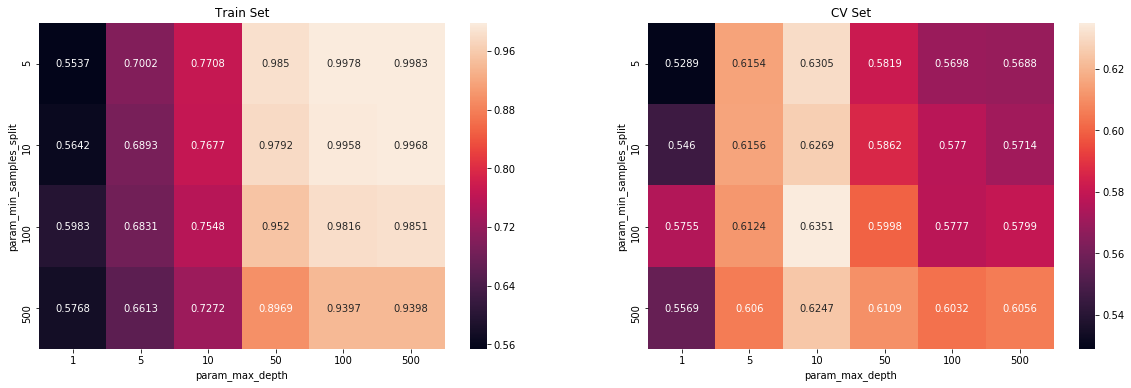

In [218]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


In [219]:
classifier.best_params_


{'max_depth': 10, 'min_samples_split': 100}

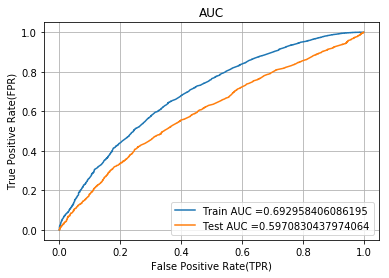

In [220]:
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 5, n_estimators=10)
model.fit(X_trs1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1)
y_test_pred = batch_predict(model, X_tes1)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()


CONFUSION MATRIX


the maximum value of tpr*(1-fpr) 0.24999976752166 for threshold 0.841


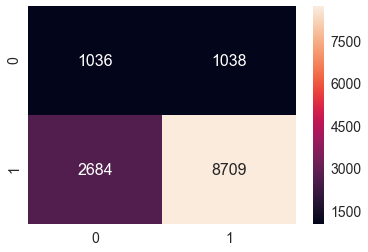

In [221]:
conf_matr_df_train_bow = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_bow, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.24997581295350713 for threshold 0.849


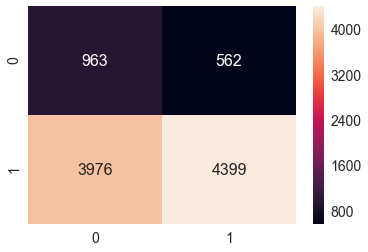

In [222]:
conf_matr_df_test_bow = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_bow, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>SET-2 categorical, numerical features + project_title(TFIDF)+preprocessed_eassay</h1>

In [223]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_trs1 =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1 ,X_train_essay_tfidf, X_train_titles_tfidf ,price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1 = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 , X_cv_essay_tfidf, X_cv_titles_tfidf,price_cv, quantity_cv ,prev_projects_cv)).tocsr()
X_tes1 = hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1 , X_test_essay_tfidf,X_test_titles_tfidf , price_test, quantity_test ,prev_projects_test)).tocsr()

In [224]:
print("Final Data matrix")
print(X_trs1.shape, y_train.shape)
print(X_cvs1.shape, y_cv.shape)
print(X_tes1.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 7906) (13467,)
(6633, 7906) (6633,)
(9900, 7906) (9900,)


In [225]:
RF = RandomForestClassifier()
parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}
classifier = GridSearchCV(RF, parameters, cv=3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_trs1, y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

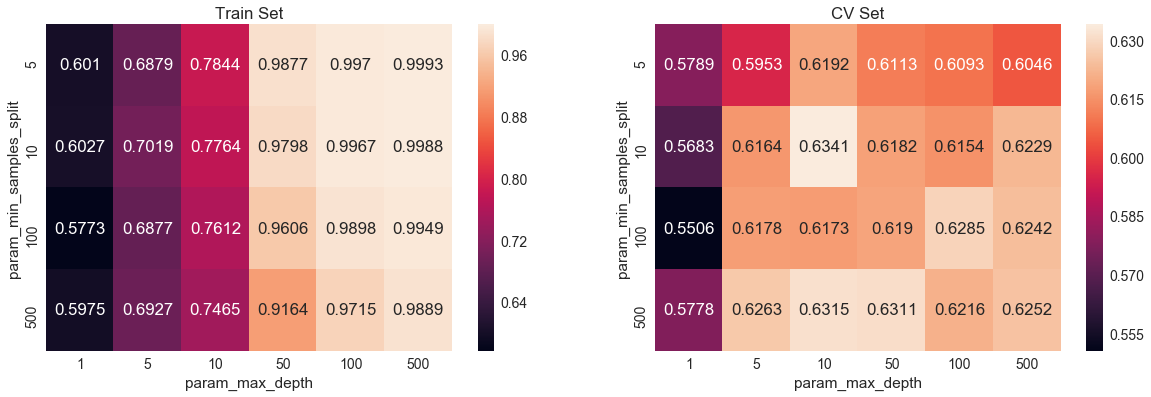

In [226]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

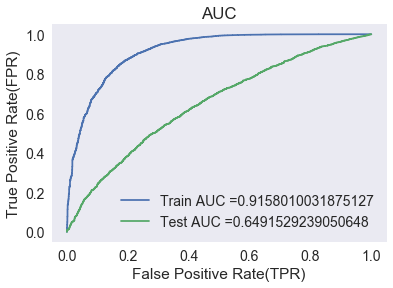

In [227]:
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 10, n_estimators=100)
model.fit(X_trs1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1)
y_test_pred = batch_predict(model, X_tes1)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

<b>CONFUSION MATRIX

In [228]:
conf_matr_df_train_tfidf = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999976752166 for threshold 0.811


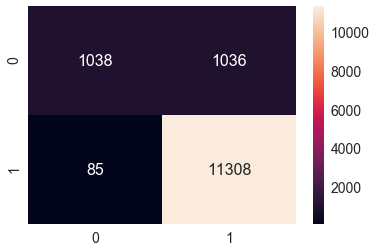

In [229]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_tfidf, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.24999989250201562 for threshold 0.821


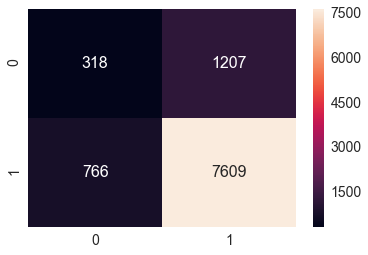

In [230]:
conf_matr_df_test_tfidf= pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds,test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_tfidf, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>SET-3 categorical, numerical features + project_title(avg_w2v)+ preprocessed_essay</h1>

<b>COMBINING ALL FEATURES


In [231]:
from scipy import sparse
X_trs1 =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1,sparse.csr_matrix(avg_w2v_vectors_train),sparse.csr_matrix(avg_w2v_vectors_titles_train),price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1 = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 ,sparse.csr_matrix(avg_w2v_vectors_cv),sparse.csr_matrix(avg_w2v_vectors_titles_cv),price_cv, quantity_cv ,prev_projects_cv)).tocsr()
X_tes1 = hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1,sparse.csr_matrix(avg_w2v_vectors_test),sparse.csr_matrix(avg_w2v_vectors_titles_test),  price_test, quantity_test ,prev_projects_test)).tocsr()

In [232]:
print("Final Data matrix")
print(X_trs1.shape, y_train.shape)
print(X_cvs1.shape, y_cv.shape)
print(X_tes1.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 613) (13467,)
(6633, 613) (6633,)
(9900, 613) (9900,)


In [233]:
RF = RandomForestClassifier()
parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}
classifier = GridSearchCV(RF, parameters, cv=3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_trs1, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

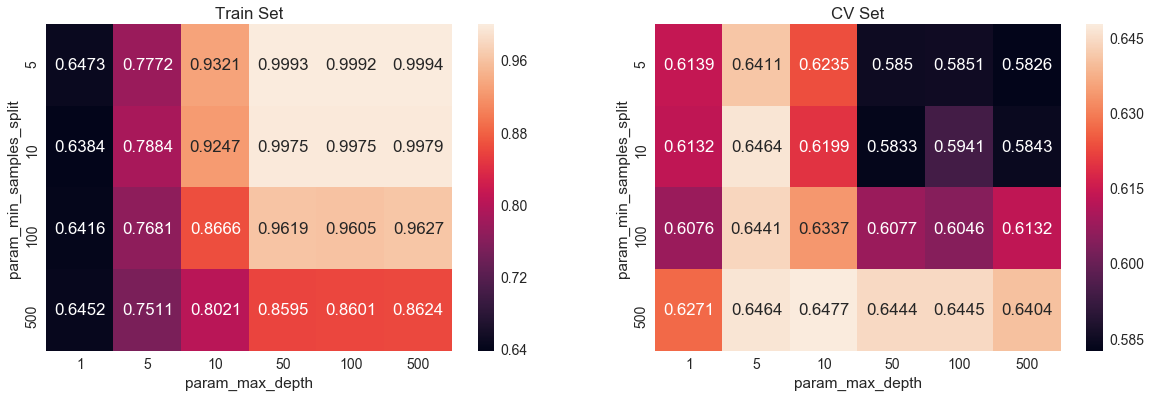

In [234]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


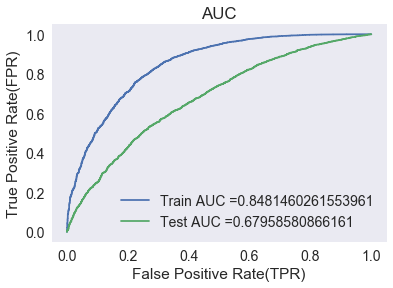

In [235]:
classifier.best_params_
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 5, n_estimators=500)
model.fit(X_trs1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1)
y_test_pred = batch_predict(model, X_tes1)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()


<b>confusion matrix

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.812


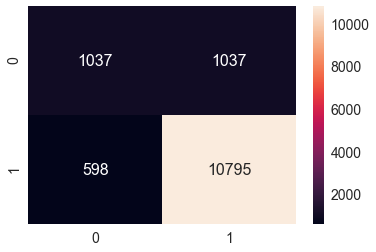

In [236]:
conf_matr_df_train_tfidfw2v = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_tfidfw2v, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>SET-4 categorical, numerical features + project_title(tfidf_w2v)+ preprocessed_eassay</h1>

In [237]:
X_trs1 =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1,sparse.csr_matrix(tfidf_w2v_vectors_train),sparse.csr_matrix(tfidf_w2v_vectors_titles_train),price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1 = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 ,sparse.csr_matrix(tfidf_w2v_vectors_cv),sparse.csr_matrix(tfidf_w2v_vectors_titles_cv), price_cv, quantity_cv ,prev_projects_cv)).tocsr()
X_tes1 = hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1,sparse.csr_matrix(tfidf_w2v_vectors_test),sparse.csr_matrix(tfidf_w2v_vectors_titles_test), price_test, quantity_test ,prev_projects_test)).tocsr()


In [238]:
print("Final Data matrix")
print(X_trs1.shape, y_train.shape)
print(X_cvs1.shape, y_cv.shape)
print(X_tes1.shape, y_test.shape)
print("="*100)


Final Data matrix
(13467, 613) (13467,)
(6633, 613) (6633,)
(9900, 613) (9900,)


In [239]:
RF = RandomForestClassifier()
parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}
classifier = GridSearchCV(RF, parameters, cv=3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_trs1, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

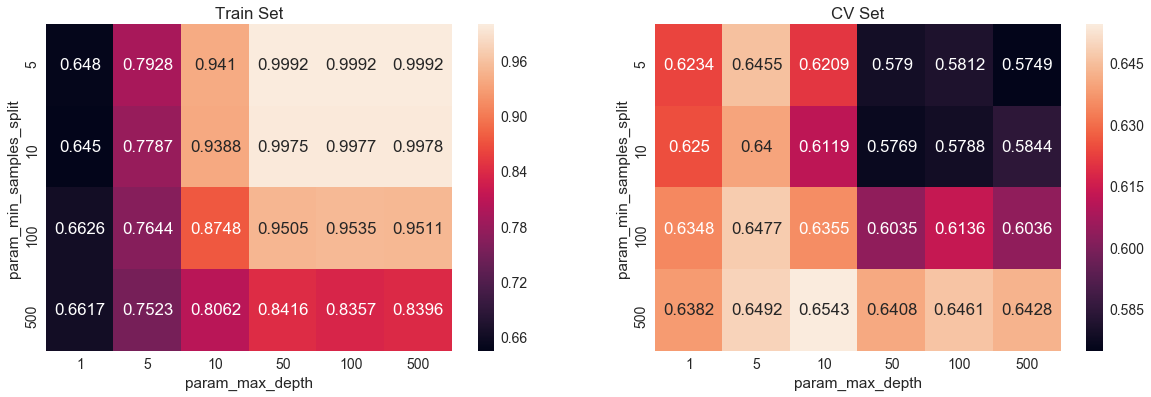

In [240]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


In [241]:
classifier.best_params_max_depth,n_estimators=3,50


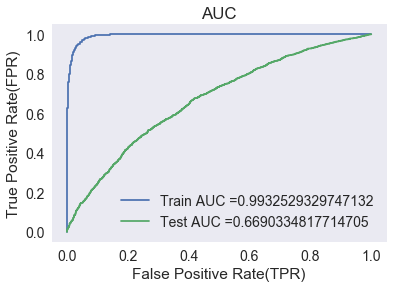

In [242]:
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 10, n_estimators=500)
model.fit(X_trs1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1)
y_test_pred = batch_predict(model, X_tes1)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.15507421173569258 for threshold 0.767


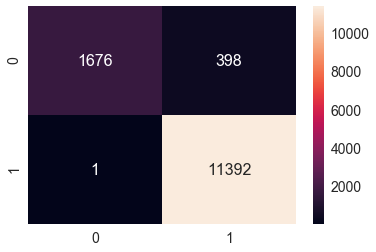

In [243]:
conf_matr_df_train_tfidfw2v = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_tfidfw2v, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>---GRADIENT BOOSTING DECISION TREES---</h1>

<h2>GRADIENT BOOSTING USING BOW</h2>

In [244]:
from sklearn.ensemble import GradientBoostingClassifier


In [245]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_trs1 =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1 ,X_train_essay_bow, X_train_titles_bow ,price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1 = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 , X_cv_essay_bow, X_cv_titles_bow,price_cv, quantity_cv ,prev_projects_cv)).tocsr()
X_tes1 = hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1 , X_test_essay_bow,X_test_titles_bow , price_test, quantity_test ,prev_projects_test)).tocsr()


In [246]:
print("Final Data matrix")
print(X_trs1.shape, y_train.shape)
print(X_cvs1.shape, y_cv.shape)
print(X_tes1.shape, y_test.shape)
print("="*100)


Final Data matrix
(13467, 5777) (13467,)
(6633, 5777) (6633,)
(9900, 5777) (9900,)


In [254]:
from sklearn.metrics import roc_auc_score
dt_bow=GradientBoostingClassifier()
train_auc=[]
cv_auc=[]
max_depth=[1,5,10,50]
n_estimators = [5,10,50,100]
for i in tqdm(max_depth):
    for j in (n_estimators):
        dt_bow=GradientBoostingClassifier(max_depth=i,min_samples_split=j)
        dt_bow.fit(X_trs1,y_train)
        y_train_pred = batch_predict(dt_bow, X_trs1)
        y_cv_pred = batch_predict(dt_bow, X_cvs1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [1:51:46<00:00, 1676.50s/it]


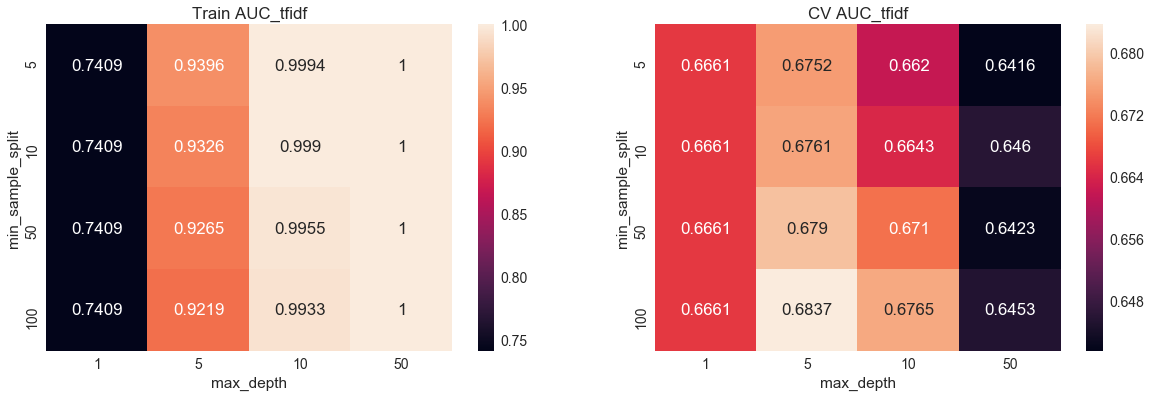

In [255]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(20,6))
max_depth= [1,5,10,50]
n_estimators = [5,10,50,100]
df = DataFrame(np.reshape(train_auc,(4,4)).T, index=n_estimators, columns=max_depth)
df1 = DataFrame(np.reshape(cv_auc,(4,4)).T, index=n_estimators, columns=max_depth)
sea.heatmap(df, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(df1, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train AUC_tfidf')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('min_sample_split')
ax[1].set_title('CV AUC_tfidf')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('min_sample_split')
plt.show()


In [256]:
max_depth,n_estimators=5,50


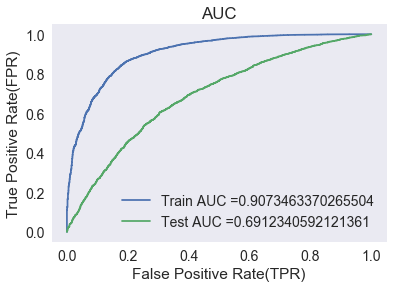

In [257]:
from sklearn.metrics import roc_curve, auc
model = GradientBoostingClassifier(max_depth = 5, n_estimators=50)
model.fit(X_trs1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1)
y_test_pred = batch_predict(model, X_tes1)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()


<b>confusion matrix

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.715


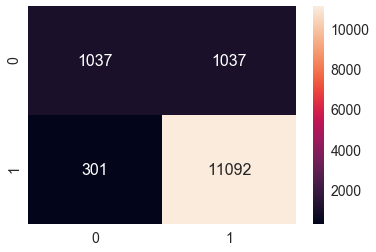

In [258]:
conf_matr_df_train_bow = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_bow, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.24999989250201562 for threshold 0.772


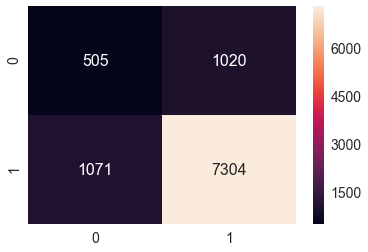

In [259]:
conf_matr_df_test_bow = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_bow, annot=True,annot_kws={"size": 16}, fmt='g')


<h1>SET 2 numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)</h1>

<h2>COMBINING ALL FEATURES</h>.

In [260]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_trs1 =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1 ,X_train_essay_tfidf, X_train_titles_tfidf , price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1 = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 , X_cv_essay_tfidf, X_cv_titles_tfidf,price_cv, quantity_cv ,prev_projects_cv)).tocsr()
X_tes1 = hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1 , X_test_essay_tfidf,X_test_titles_tfidf , price_test, quantity_test ,prev_projects_test)).tocsr()


In [261]:
from sklearn.metrics import roc_auc_score
dt_tfidf=GradientBoostingClassifier()
train_auc_tfidf=[]
cv_auc_tfidf=[]
max_depth=[1,5,10,50]
n_estimators = [5,10,50,100]
for i in tqdm(max_depth):
    for j in (n_estimators):
        dt_tfidf=GradientBoostingClassifier(max_depth=i,min_samples_split=j)
        dt_tfidf.fit(X_trs1,y_train)
        y_train_pred = batch_predict(dt_tfidf, X_trs1)
        y_cv_pred = batch_predict(dt_tfidf, X_cvs1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
        train_auc_tfidf.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_tfidf.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [2:01:27<00:00, 1821.93s/it]


In [262]:
cv_auc_tfidf


[0.666130381727137,
 0.666130381727137,
 0.666130381727137,
 0.666130381727137,
 0.6764590952785516,
 0.68072307975843,
 0.6768800485597184,
 0.68186316156159,
 0.6615322699434472,
 0.6718705823466296,
 0.6704159199923488,
 0.6744390605551418,
 0.6461151178075804,
 0.639403775176043,
 0.6387212095530566,
 0.6478097514560586]

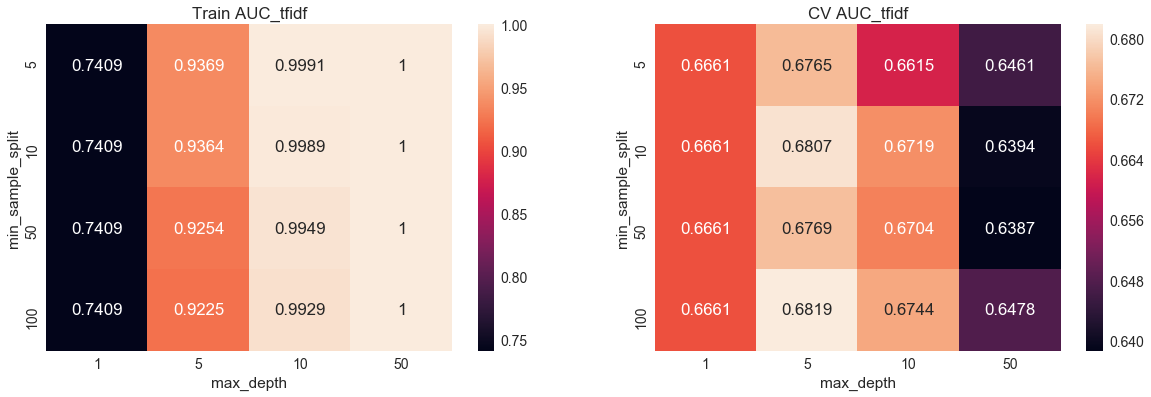

In [263]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(20,6))
max_depth= [1,5,10,50]
n_estimators = [5,10,50,100]
df = DataFrame(np.reshape(train_auc_tfidf,(4,4)).T, index=n_estimators, columns=max_depth)
df1 = DataFrame(np.reshape(cv_auc_tfidf,(4,4)).T, index=n_estimators, columns=max_depth)
sea.heatmap(df, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(df1, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train AUC_tfidf')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('min_sample_split')
ax[1].set_title('CV AUC_tfidf')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('min_sample_split')
plt.show()

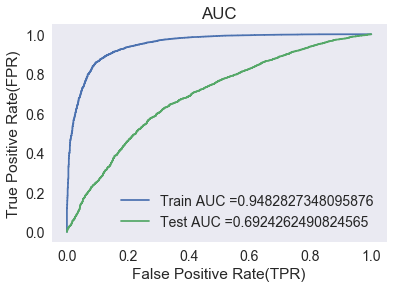

In [264]:
from sklearn.metrics import roc_curve, auc
model = GradientBoostingClassifier(max_depth = 5, n_estimators=100)
model.fit(X_trs1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1)
y_test_pred = batch_predict(model, X_tes1)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()


<b>CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.24999976752166 for threshold 0.657


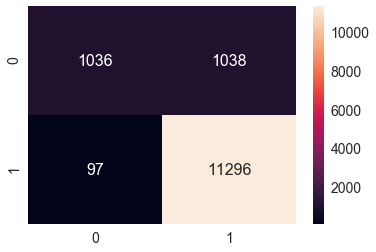

In [265]:
conf_matr_df_train_tfidf = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_tfidf, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.24999989250201562 for threshold 0.657


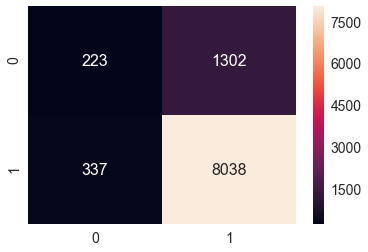

In [266]:
conf_matr_df_test_tfidf = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds,test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_tfidf, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>SET-3 categorical, numerical features + project_title(avg_w2v)+ preprocessed_eassay</h1>

<h3>COMBINING ALL FEATURES</h3>

In [267]:
from scipy import sparse


In [268]:
X_trs1_av =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1,sparse.csr_matrix(avg_w2v_vectors_train),sparse.csr_matrix(avg_w2v_vectors_titles_train),price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1_av = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 ,sparse.csr_matrix(avg_w2v_vectors_cv),sparse.csr_matrix(avg_w2v_vectors_titles_cv),price_cv, quantity_cv , prev_projects_cv)).tocsr()
X_tes1_av =hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1,sparse.csr_matrix(avg_w2v_vectors_test),sparse.csr_matrix(avg_w2v_vectors_titles_test), price_test, quantity_test , prev_projects_test)).tocsr()


In [269]:
print("Final Data matrix")
print(X_trs1_av.shape, y_train.shape)
print(X_cvs1_av.shape, y_cv.shape)
print(X_tes1_av.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 613) (13467,)
(6633, 613) (6633,)
(9900, 613) (9900,)


In [270]:
from sklearn.metrics import roc_auc_score
dt_avgw2v=GradientBoostingClassifier()
train_auc_avg_w2v=[]
cv_auc_avg_w2v=[]
n_estimators=[5,10,50,100]
max_depth = [1,5,10,50]
for i in tqdm(max_depth):
    for j in (n_estimators):
        dt_avgw2v=GradientBoostingClassifier(max_depth=i,min_samples_split=j)
        dt_avgw2v.fit(X_trs1_av,y_train)
        y_train_pred = batch_predict(dt_avgw2v, X_trs1_av)
        y_cv_pred = batch_predict(dt_avgw2v, X_cvs1_av)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
        train_auc_avg_w2v.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_avg_w2v.append(roc_auc_score(y_cv, y_cv_pred))


100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [7:33:35<00:00, 6803.81s/it]


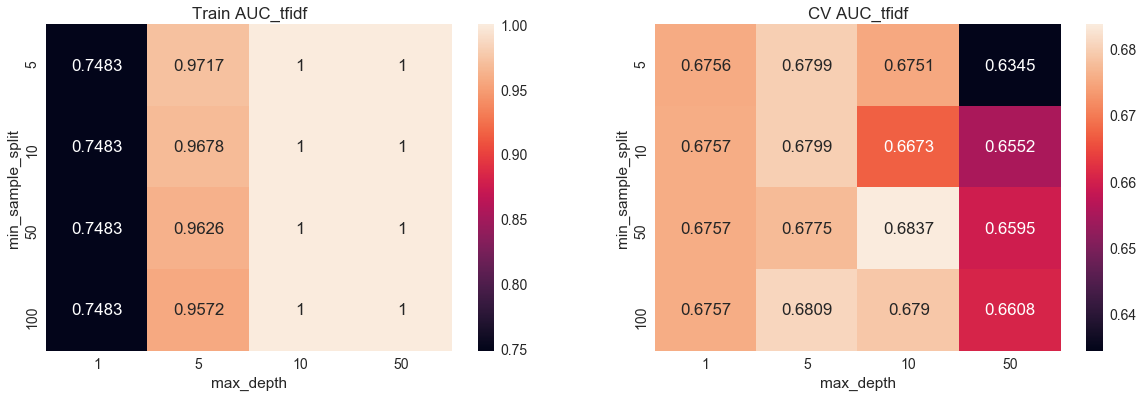

In [271]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(20,6))
max_depth= [1,5,10,50]
n_estimators = [5,10,50,100]
df = DataFrame(np.reshape(train_auc_avg_w2v,(4,4)).T, index=n_estimators, columns=max_depth)
df1 = DataFrame(np.reshape(cv_auc_avg_w2v,(4,4)).T, index=n_estimators, columns=max_depth)
sea.heatmap(df, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(df1, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train AUC_tfidf')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('min_sample_split')
ax[1].set_title('CV AUC_tfidf')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('min_sample_split')
plt.show()

In [272]:
max_depth,n_estimators=5,5


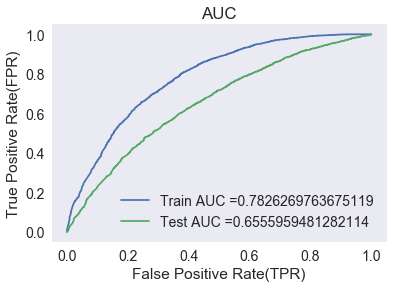

In [273]:
from sklearn.metrics import roc_curve, auc
model = GradientBoostingClassifier(max_depth = 5, n_estimators=5)
model.fit(X_trs1_av, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1_av)
y_test_pred = batch_predict(model, X_tes1_av)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

<b>confusion matrix

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.822


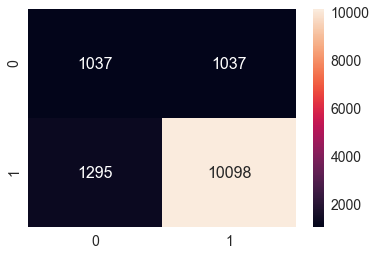

In [274]:
conf_matr_df_train_avgw2v = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_avgw2v, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.24999989250201562 for threshold 0.847


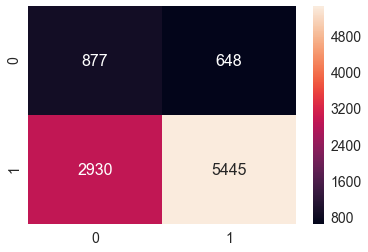

In [278]:
conf_matr_df_test_avgw2v= pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds,test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_avgw2v, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>SET-4 categorical, numerical features + project_title(tfidf_w2v)+ preprocessed_eassay</h1>

<h3>COMBINING ALL FEATURES</h3>

In [279]:
X_trs1_tf =hstack((X_train_sstate_0,X_train_sstate_1,X_train_cl_0,X_train_cl_1,X_train_scl_0,X_train_scl_1,X_train_tp_0,X_train_tp_1,X_train_pcl_0,X_train_pcl_1,sparse.csr_matrix(tfidf_w2v_vectors_train),sparse.csr_matrix(tfidf_w2v_vectors_titles_train),price_train, quantity_train ,prev_projects_train)).tocsr()
X_cvs1_tf = hstack((X_cv_sstate_0,X_cv_sstate_1,X_cv_cl_0,X_cv_cl_1,X_cv_scl_0,X_cv_scl_1,X_cv_tp_0,X_cv_tp_1,X_cv_pcl_0,X_cv_pcl_1 ,sparse.csr_matrix(tfidf_w2v_vectors_cv),sparse.csr_matrix(tfidf_w2v_vectors_titles_cv),price_cv, quantity_cv , prev_projects_cv)).tocsr()
X_tes1_tf =hstack((X_test_sstate_0,X_test_sstate_1,X_test_cl_0,X_test_cl_1,X_test_scl_0,X_test_scl_1,X_test_tp_0,X_test_tp_1,X_test_pcl_0,X_test_pcl_1,sparse.csr_matrix(tfidf_w2v_vectors_test),sparse.csr_matrix(tfidf_w2v_vectors_titles_test), price_test, quantity_test , prev_projects_test)).tocsr()


In [280]:
print("Final Data matrix")
print(X_trs1_tf.shape, y_train.shape)
print(X_cvs1_tf.shape, y_cv.shape)
print(X_tes1_tf.shape, y_test.shape)
print("="*100)


Final Data matrix
(13467, 613) (13467,)
(6633, 613) (6633,)
(9900, 613) (9900,)


In [281]:
from sklearn.metrics import roc_auc_score
dt_w2v=GradientBoostingClassifier
train_auc_tfidf_w2v=[]
cv_auc_tfidf_w2v=[]
max_depth=[1,5,10,50]
n_estimators = [5,10,50]
for i in tqdm(max_depth):
    for j in (n_estimators):
        dt_w2v=GradientBoostingClassifier(max_depth=i,min_samples_split=j)
        dt_w2v.fit(X_trs1_tf,y_train)
        y_train_pred = batch_predict(dt_w2v, X_trs1_tf)
        y_cv_pred = batch_predict(dt_w2v, X_cvs1_tf)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
        train_auc_tfidf_w2v.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_tfidf_w2v.append(roc_auc_score(y_cv, y_cv_pred))


100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [5:49:48<00:00, 5247.08s/it]


In [282]:
train_auc_tfidf_w2v

[0.7494117630130531,
 0.7494117630130531,
 0.7494117630130531,
 0.9725489547160572,
 0.9723589346382562,
 0.9627289794838412,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

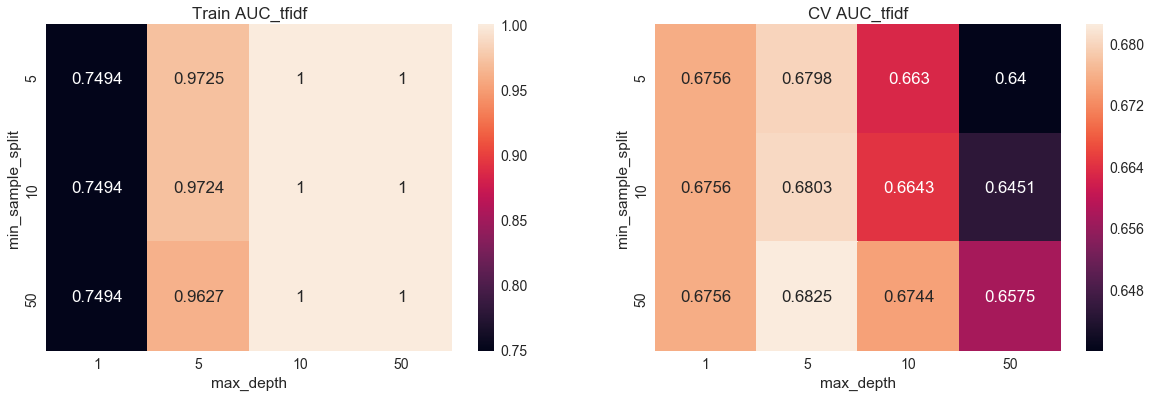

In [283]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(20,6))
max_depth= [1,5,10,50]
n_estimators = [5,10,50]
df = DataFrame(np.reshape(train_auc_tfidf_w2v,(4,3)).T, index=n_estimators, columns=max_depth)
df1 = DataFrame(np.reshape(cv_auc_tfidf_w2v,(4,3)).T, index=n_estimators, columns=max_depth)
sea.heatmap(df, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(df1, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train AUC_tfidf')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('min_sample_split')
ax[1].set_title('CV AUC_tfidf')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('min_sample_split')
plt.show()

In [284]:
max_depth,n_estimators=5,50

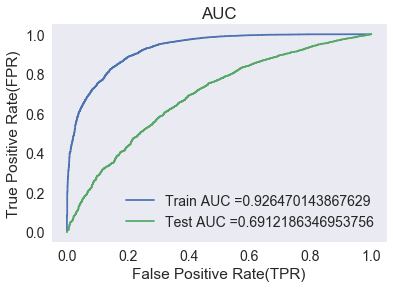

In [285]:
from sklearn.metrics import roc_curve, auc
model = GradientBoostingClassifier(max_depth = 5, n_estimators=50)
model.fit(X_trs1_tf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_trs1_tf)
y_test_pred = batch_predict(model, X_tes1_tf)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

<b>confusion matrix

the maximum value of tpr*(1-fpr) 0.24999976752166 for threshold 0.658


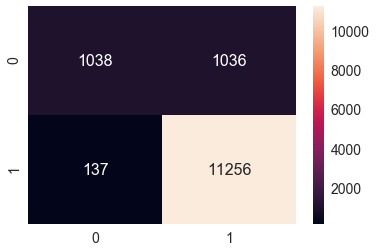

In [286]:
conf_matr_df_train_tfidfw2v = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred,tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_tfidfw2v, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.24999989250201562 for threshold 0.704


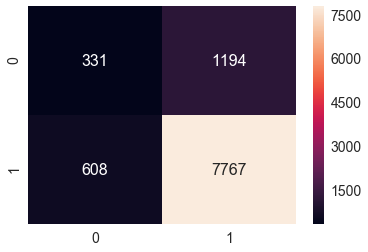

In [287]:
conf_matr_df_test_tfidf2v= pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred,tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_tfidf2v, annot=True,annot_kws={"size": 16}, fmt='g')


In [289]:
!pip3 install prettytable

  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=12670 sha256=216b28befa2d4dfbceac6185406c4fee2eefe36ee89838c946337c5263d53eec
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


<h1>Conclusion</h1>

In [290]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
print('-----------------------------------------FOR RANDOM FOREST CLASSIFIER----------------------------------')
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "max_depth", "min_sample_split","AUC"]
x.add_row(["BOW", "RANDOMFOREST", "10", "100","0.69"])
x.add_row(["TFIDF","RANDOMFOREST", "10", "100","0.64"])
x.add_row(["AVG_W2V","RANDOMFOREST", "5", "500","0.67"])
x.add_row(["TFIDF-W2V","RANDOMFOREST", "10", "500","0.669"])
print(x)

-----------------------------------------FOR RANDOM FOREST CLASSIFIER----------------------------------
+------------+--------------+-----------+------------------+-------+
| Vectorizer |    Model     | max_depth | min_sample_split |  AUC  |
+------------+--------------+-----------+------------------+-------+
|    BOW     | RANDOMFOREST |     10    |       100        |  0.69 |
|   TFIDF    | RANDOMFOREST |     10    |       100        |  0.64 |
|  AVG_W2V   | RANDOMFOREST |     5     |       500        |  0.67 |
| TFIDF-W2V  | RANDOMFOREST |     10    |       500        | 0.669 |
+------------+--------------+-----------+------------------+-------+


In [291]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
print('-----------------------------------------FOR GRADIENT BOOSTING CLASSIFIER----------------------------------')
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "max_depth", "min_sample_split","AUC"]
x.add_row(["BOW", "GRADIENT BOOSTING", "5", "50","0.69"])
x.add_row(["TFIDF","GRADIENT BOOStING", "5", "100","0.69"])
x.add_row(["AVG_W2V","GRADIENT BOOSTING", "5", "5","0.65"])
x.add_row(["TFIDF-W2V","GRADIENT BOOSTING", "5", "50","0.69"])
print(x)

-----------------------------------------FOR GRADIENT BOOSTING CLASSIFIER----------------------------------
+------------+-------------------+-----------+------------------+------+
| Vectorizer |       Model       | max_depth | min_sample_split | AUC  |
+------------+-------------------+-----------+------------------+------+
|    BOW     | GRADIENT BOOSTING |     5     |        50        | 0.69 |
|   TFIDF    | GRADIENT BOOStING |     5     |       100        | 0.69 |
|  AVG_W2V   | GRADIENT BOOSTING |     5     |        5         | 0.65 |
| TFIDF-W2V  | GRADIENT BOOSTING |     5     |        50        | 0.69 |
+------------+-------------------+-----------+------------------+------+


I have taken 30k points for RandomforestClassifier<br>
The accuracy of randomclassifier is bettter than the gradient boosting techinque.<br>
The  chances of overfitting is more in gradient boosting.
